In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import os
import pandas as pd

plt.rcParams.update({'font.size': 16})

wavelength of ./ledSpectralData/1a-red.csv 624.94


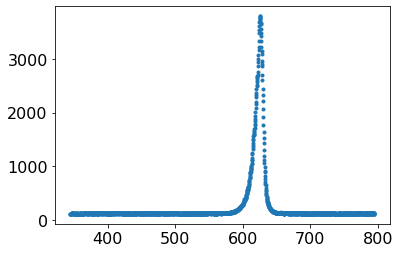

0.22000000000002728


In [103]:
f = "./ledSpectralData/1a-red.csv"

def get_wavelength(f):
    data = np.genfromtxt(f, delimiter=",") 
    peak = find_peaks(data[:,1], height=3000, threshold=15)[0][0]
    print("wavelength of {}".format(f), data[:,0][peak])
    plt.plot(data[:,0], data[:,1], ".")
    plt.show()
    
    err_syst1 = np.diff(data[:,0])[peak]
    err_syst2 = np.diff(data[:,0])[peak+1]

    return (data[:,0][peak], max(err_syst1, err_syst2))

get_wavelength(f)

err_syst1 = np.diff(data[:,0])[peak]
err_syst2 = np.diff(data[:,0])[peak+1]
print(err_syst2)

wavelength of ./ledSpectralData/6a-green.csv 527.16


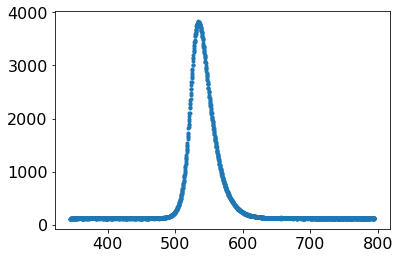

wavelength of ./ledSpectralData/5a-yellowgreen.csv 559.32


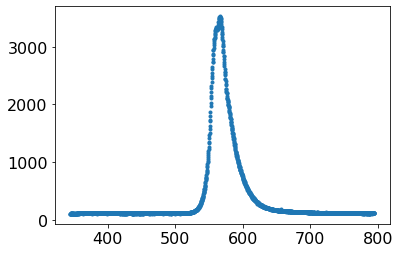

wavelength of ./ledSpectralData/4a-yellow.csv 588.54


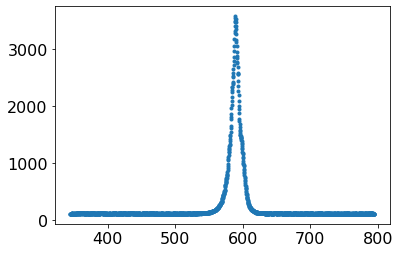

wavelength of ./ledSpectralData/1a-red.csv 624.94


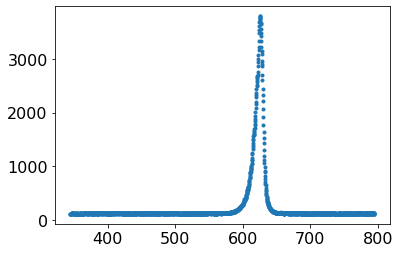

wavelength of ./ledSpectralData/3b-orange.csv 607.23


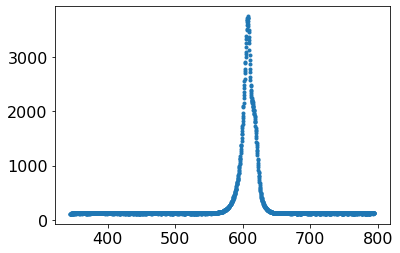

wavelength of ./ledSpectralData/7a-blue.csv 460.43


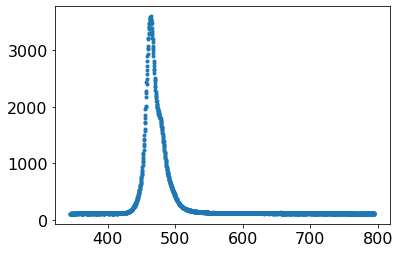

wavelength of ./ledSpectralData/6c-green.csv 521.5


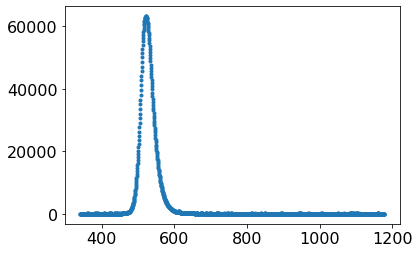

wavelength of ./ledSpectralData/7c-blue.csv 456.0


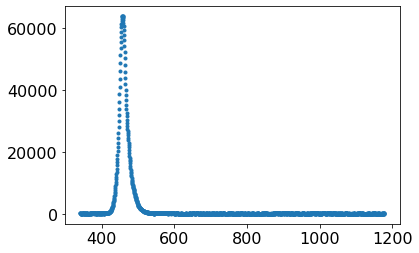

wavelength of ./ledSpectralData/1b-red.csv 631.04


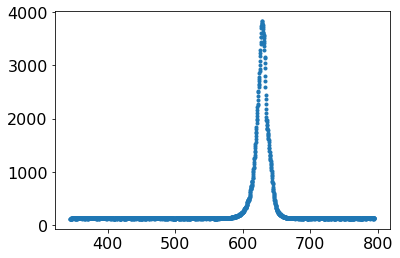

wavelength of ./ledSpectralData/5b-yellowgreen.csv 558.43


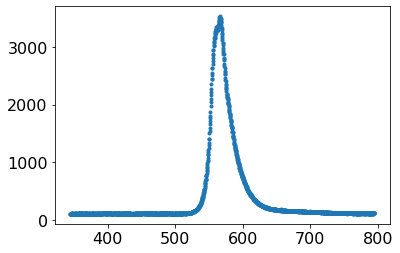

wavelength of ./ledSpectralData/7b-blue.csv 457.24


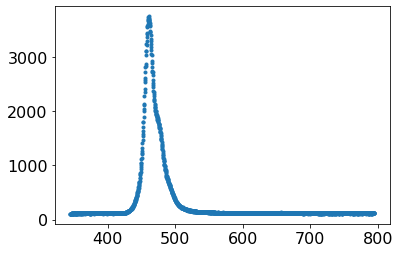

wavelength of ./ledSpectralData/8b-uv.csv 397.76


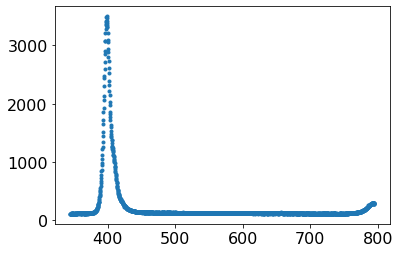

wavelength of ./ledSpectralData/8c-uv.csv 398.5


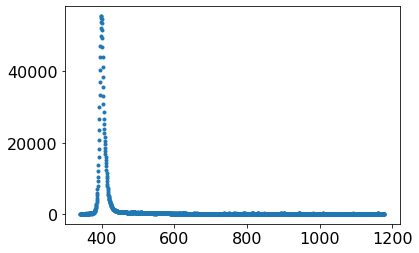

wavelength of ./ledSpectralData/3a-orange.csv 605.7


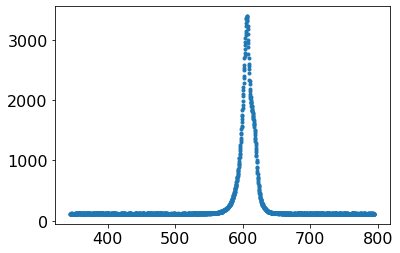

wavelength of ./ledSpectralData/4b-yellow.csv 587.88


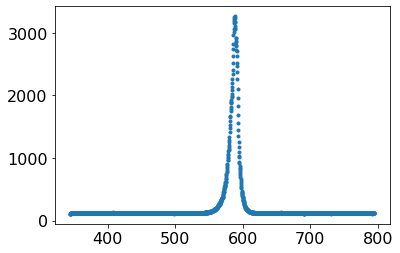

wavelength of ./ledSpectralData/5c-yellowgreen.csv 567.0


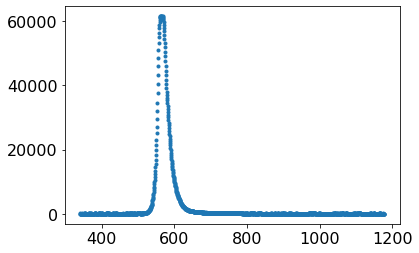

wavelength of ./ledSpectralData/4c-yellow.csv 594.5


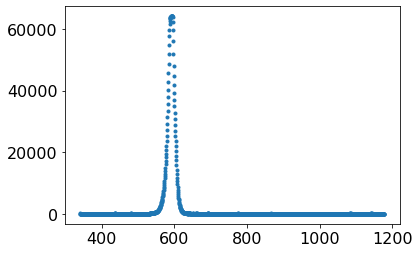

wavelength of ./ledSpectralData/8a-uv.csv 397.76


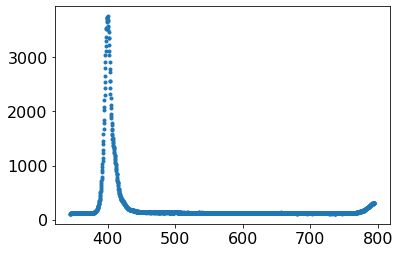

wavelength of ./ledSpectralData/6b-green.csv 527.16


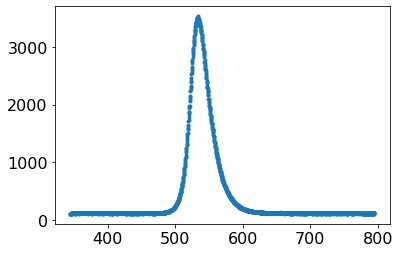

In [104]:
n_runs = 3
colors = ["-red.csv", "-orange.csv", "-yellow.csv", "-yellowgreen.csv", "-green.csv", "-blue.csv", "-uv.csv"]
w = {c: [] for c in colors}

n = 0
for i in os.listdir("./ledSpectralData/"):
    f = os.path.join("./ledSpectralData/", i)
    
    for color in colors:
        if color in f:
            w[color].append(get_wavelength(f))
            

In [106]:
w

{'-red.csv': [(624.94, 0.22000000000002728), (631.04, 0.22000000000002728)],
 '-orange.csv': [(607.23, 0.22000000000002728), (605.7, 0.22000000000002728)],
 '-yellow.csv': [(588.54, 0.22000000000002728),
  (587.88, 0.22000000000002728),
  (594.5, 0.5)],
 '-yellowgreen.csv': [(559.32, 0.22000000000002728),
  (558.43, 0.22000000000002728),
  (567.0, 0.5)],
 '-green.csv': [(527.16, 0.22000000000002728),
  (521.5, 0.5),
  (527.16, 0.22000000000002728)],
 '-blue.csv': [(460.43, 0.2300000000000182),
  (456.0, 0.5),
  (457.24, 0.2300000000000182)],
 '-uv.csv': [(397.76, 0.2400000000000091),
  (398.5, 0.5),
  (397.76, 0.2400000000000091)]}

In [107]:
wavelengths = []
w_stat = []
w_syst = []

for c in colors:
    arr = np.array(w[c])
    wavelengths.append(np.mean(arr[:,0]))
    w_stat.append(np.std(arr[:,0]))
    w_syst.append(np.mean(arr[:,1]))
    
print(wavelengths)

[627.99, 606.465, 590.3066666666667, 561.5833333333334, 525.2733333333332, 457.89000000000004, 398.00666666666666]


In [108]:
w_uncert = np.sqrt(np.array(w_stat)**2 + np.array(w_syst)**2) # uncertainties

d = np.concatenate((np.array(wavelengths)[:,np.newaxis], 
                w_uncert[:,np.newaxis]), axis=1) # put everything into one array

df_wavelengths = pd.DataFrame(d, index = colors, columns = ["w", "w_uncert"])

In [109]:
# save to file
#df_wavelengths.to_csv("wavelengths.csv")

In [110]:
df_wavelengths

,w,w_uncert
-red.csv,627.990000,3.057924
-orange.csv,606.465000,0.796006
-yellow.csv,590.306667,2.993794
-yellowgreen.csv,561.583333,3.860095
-green.csv,525.273333,2.686485
-blue.csv,457.890000,1.893269
-uv.csv,398.006667,0.477912
